In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from tqdm import  tqdm

In [3]:
import numpy as np

In [4]:
# from importlib import reload

import GTN
# reload(GTN)
# from GTN import *

# Use the williamson form

In [4]:
GTN.get_Haar(1,3)

array([[-0.90993895, -0.032357  ,  0.4134781 ],
       [ 0.27429987, -0.9610925 ,  0.03256967],
       [ 0.7438302 , -0.37791743,  0.55126676]])

# Use the $S^2$ parametrization 

In [139]:
def run(inputs):
    L,seed=inputs
    gtn=GTN(L=L,seed=seed,op=False,random_init=False,history=False)
    for i in tqdm(range(gtn.L//2)):
        gtn.measure_all_Haar(sigma=1,even=True)
        gtn.measure_all_Haar(sigma=1,even=False)
    return gtn.C_m_history[-1]   

In [140]:
# C_m_list=[]
L=64
inputs_64=[(L,ensemble) for ensemble in range(20)]
C_m_list_64=[run(input0) for input0 in inputs_64]

L=128
inputs_128=[(L,ensemble) for ensemble in range(20)]
C_m_list_128=[run(input0) for input0 in inputs_128]


100%|██████████| 64/64 [00:22<00:00,  2.80it/s]


In [141]:
Cr_list_64=[correlation_r(C_m) for C_m in C_m_list_64]
Cr_list_128=[correlation_r(C_m) for C_m in C_m_list_128]

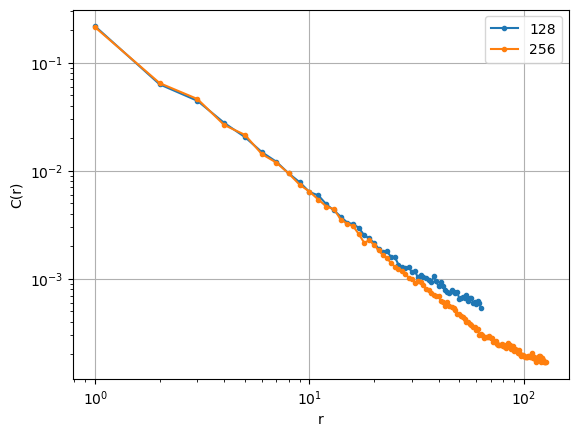

In [146]:
plt.plot(np.arange(64-1)+1,np.array(Cr_list_64).mean(axis=0),'.-',label='128')
plt.plot(np.arange(128-1)+1,np.array(Cr_list_128).mean(axis=0),'.-',label='256')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r')
plt.ylabel('C(r)')
plt.legend()
plt.grid()



'-1.50'

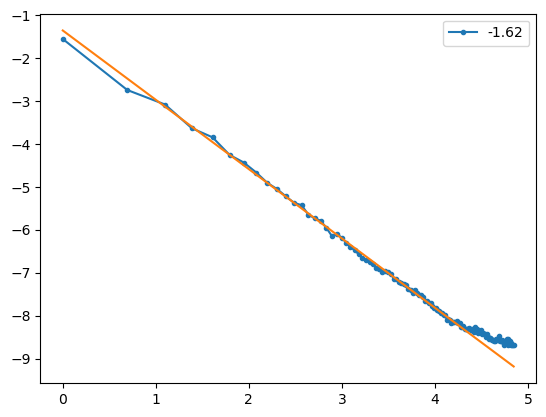

In [194]:
p=np.polyfit(np.log(x_fit)[2:-50],np.log(y_fit)[2:-50],1)
plt.plot(np.log(np.arange(128-1)+1),np.log(np.array(Cr_list_128).mean(axis=0)),'.-',label=f'{p[0]:.2f}')
plt.plot(np.log(x_fit),np.poly1d(p)(np.log(x_fit)))
plt.legend()

In [153]:
x_fit=np.arange(128-1)+1
y_fit=np.array(Cr_list_128).mean(axis=0)

poly1d([-1.39893529, -2.10965368])

In [101]:
def correlation_0(Gamma,r,chi=2):
    Cr_list=[]
    L=Gamma.shape[0]//2
    for i in range(L):
        for m in range(chi):
            for n in range(chi):
                Cr_list.append(Gamma[2*i+m,(2*(i+r)+n)%(2*L)])
    return np.mean(np.array(Cr_list)**2)
    # return np.mean(np.abs(np.array(Cr_list)))

In [104]:
def correlation_r_0(Gamma):
    L=Gamma.shape[0]//2
    r_list=np.arange(1,L//2)
    return np.array([correlation_0(Gamma,r) for r in r_list])

In [92]:
def correlation(Gamma,r):
    "assume r>0"
    L=Gamma.shape[0]
    # return np.r_[np.diag(Gamma,r),np.diag(Gamma,r-L)]
    return np.mean(np.r_[np.diag(Gamma,r),np.diag(Gamma,r-L)]**2)
    

In [93]:
def correlation_r(Gamma):
    L=Gamma.shape[0]
    r_list=np.arange(1,L//2)
    return np.array([correlation(Gamma,r) for r in r_list])

In [105]:
cr=correlation_r(gtn.C_m_history[-1])
cr0=correlation_r_0(gtn.C_m_history[-1])

In [106]:
cr

array([2.19497190e-01, 7.28403786e-02, 3.87140986e-02, 2.90107279e-02,
       1.83712063e-02, 1.26402955e-02, 9.95244016e-03, 8.82009159e-03,
       7.71459426e-03, 5.14824342e-03, 3.57615508e-03, 4.29408252e-03,
       4.78396774e-03, 3.48255015e-03, 2.65439940e-03, 2.04514667e-03,
       1.73378105e-03, 1.71932811e-03, 1.75556967e-03, 1.37866467e-03,
       1.04211950e-03, 1.54875177e-03, 1.58872453e-03, 1.26962345e-03,
       1.20724297e-03, 1.01379200e-03, 1.10415888e-03, 1.10897642e-03,
       1.33206775e-03, 1.38714555e-03, 9.64520789e-04, 1.38846663e-03,
       1.13277786e-03, 7.99701207e-04, 1.12749993e-03, 8.54335716e-04,
       6.71854865e-04, 6.19591854e-04, 7.10004007e-04, 7.96482865e-04,
       6.30114477e-04, 7.16589731e-04, 5.28483965e-04, 6.62571628e-04,
       6.22111114e-04, 6.22301026e-04, 6.05428781e-04, 6.44865331e-04,
       5.31955378e-04, 4.86221503e-04, 5.46427606e-04, 5.08440396e-04,
       5.12875716e-04, 5.30831224e-04, 5.65046231e-04, 4.53255674e-04,
      

In [107]:
cr0

array([0.13671489, 0.03106727, 0.01527251, 0.00860058, 0.00587177,
       0.00395602, 0.00385752, 0.00212771, 0.0017115 , 0.00148736,
       0.00132307, 0.00141266, 0.00106672, 0.00122398, 0.00123691,
       0.00128326, 0.00097011, 0.00083   , 0.00067462, 0.00073241,
       0.00062959, 0.00059359, 0.00064669, 0.00062674, 0.00050368,
       0.00051394, 0.00051246, 0.00049179, 0.00042782, 0.00044709,
       0.00038898, 0.00033735, 0.00038984, 0.00031299, 0.00032529,
       0.00043124, 0.0003071 , 0.00033856, 0.00030402, 0.00028424,
       0.00027473, 0.00027227, 0.00021487, 0.00026187, 0.00020148,
       0.00021687, 0.000235  , 0.00021193, 0.00024081, 0.00020943,
       0.00017602, 0.00018991, 0.00024659, 0.00021911, 0.00016922,
       0.00022651, 0.00019377, 0.00023842, 0.00020596, 0.000196  ,
       0.00023864, 0.00019459, 0.00020186])

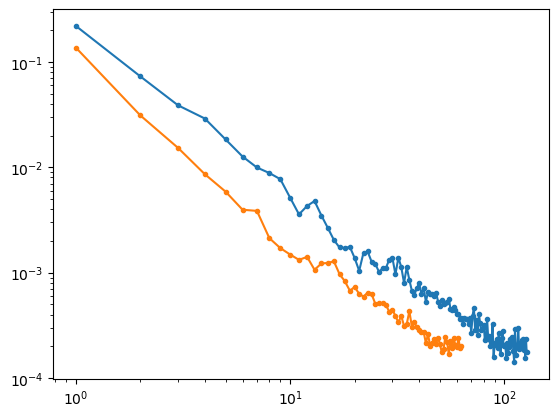

In [117]:
plt.plot(np.arange(gtn.C_m_history[-1].shape[0]//2-1)+1,cr,'.-',label='Cr')
plt.plot(np.arange(gtn.C_m_history[-1].shape[0]//4-1)+1,cr0,'.-',label='Cr0')

plt.xscale('log')
plt.yscale('log')

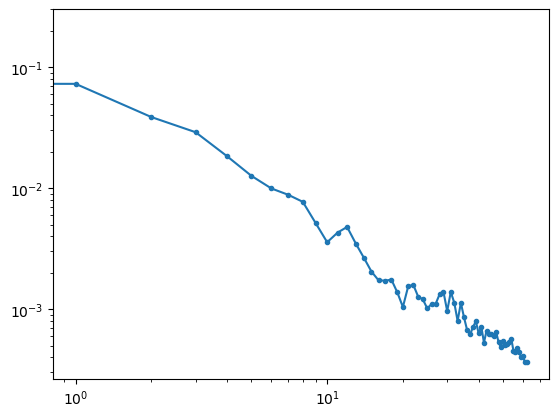

In [95]:
plt.plot(correlation_r_0(gtn.C_m_history[-1]),'.-')
plt.xscale('log')
plt.yscale('log')

In [ ]:
cc_list=np.array([correlation_r(Gamma) for Gamma in C_m_list])

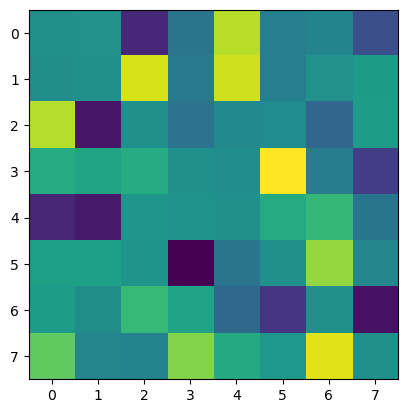

In [ ]:
plt.imshow((gtn.C_m_history[-2]))

In [ ]:
gtn.measure_all()

# 0d dynamics

In [5]:
def run(inputs):
    L,seed,tf=inputs
    gtn=GTN.GTN(L=L,seed=seed,op=False,random_init=False,history=True)
    gtn.set([[2, 3]], [-1])
    for i in tqdm(range(tf)):
        gtn.measure_all_Haar(sigma=1,even=True)
        gtn.measure_all_Haar(sigma=1,even=False)

    return gtn
    # return gtn.C_m_history[-1]   

In [51]:
def run(inputs):
    L,seed,p,tf=inputs
    gtn=GTN.GTN(L=L,seed=seed,op=False,random_init=False,history=False)
    gtn.set([[2, 3]], [-1])
    C_m_history = [gtn.C_m.copy()]
    for i in (range(tf)):
        gtn.measure_all_Haar(sigma=1, even=False)
        gtn.measure_all_tri_op(p_list=1, Born=True, even=True, alpha=p)
        C_m_history.append(gtn.C_m.copy())


    return C_m_history
    return gtn
    # return gtn.C_m_history[-1]   

In [80]:
C_m_history = run((2,0,0.9,1000))


In [81]:
rho_list = [ GTN.density_matrix(Gamma) for Gamma in C_m_history[-900:]]
# rho_mean = (np.mean(rho_list,axis=0))

# np.trace(rho_mean@rho_mean)

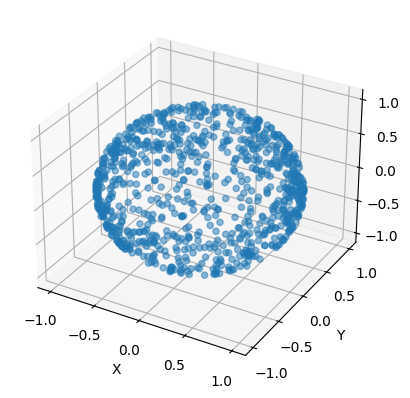

In [73]:
pts =([GTN.extract_n((Gamma)) for Gamma in rho_list])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pts_array = np.array(pts).real
ax.scatter(pts_array[:, 0], pts_array[:, 1], pts_array[:, 2], alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

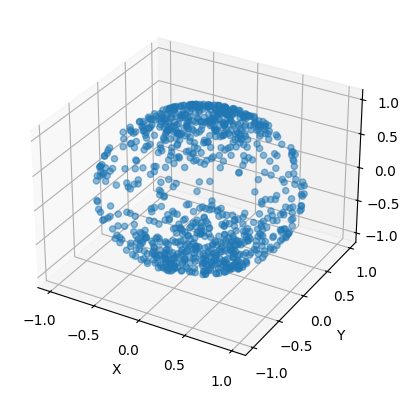

In [79]:
pts =([extract_n((Gamma)) for Gamma in rho_list[-900:]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pts_array = np.array(pts).real
ax.scatter(pts_array[:, 0], pts_array[:, 1], pts_array[:, 2], alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


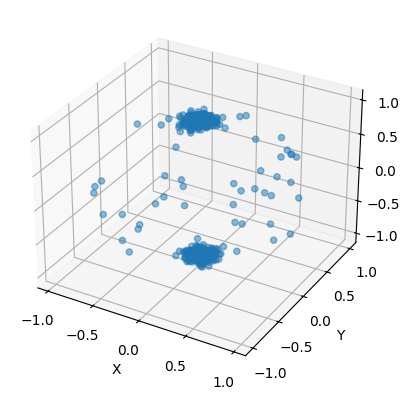

In [82]:
pts =([extract_n((Gamma)) for Gamma in rho_list[-900:]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pts_array = np.array(pts).real
ax.scatter(pts_array[:, 0], pts_array[:, 1], pts_array[:, 2], alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [156]:
rho_mean[1:3,1:3]

array([[ 0.49876768+0.j        , -0.27552117-0.41723682j],
       [-0.27552117+0.41723682j,  0.50123232+0.j        ]])

In [127]:
idx=5
rho = gtn.density_matrix(gtn.C_m_history[idx])


np.round(gtn.C_m_history[idx], 3), np.round(rho,2)



(array([[ 0., -1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [-0., -0., -0.,  1.],
        [-0., -0., -1., -0.]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]))

In [7]:
def run_and_compute_rho(inputs):
    C_m_history = run(inputs)
    # rho_mean = (np.mean([ gtn.density_matrix(Gamma) for Gamma in gtn.C_m_history[-500:]],axis=0))
    # rho_mean = np.mean([ np.abs(gtn.density_matrix(Gamma)[1,2]) for Gamma in C_m_history[100:]])
    rho_mean = [(GTN.density_matrix(Gamma)[1,2]) for Gamma in C_m_history]
    return rho_mean

In [29]:
L=2
# p_list = np.linspace(0,0.9,10)
p_list = [0.,]
# rho_mean_list = []
s_list = np.arange(1000)
tf=100
rho_mean_list = np.zeros((len(s_list), len(p_list), tf+1), dtype=complex)
for i, p in enumerate(p_list):
    for s in tqdm(s_list):
        rho_mean_list[s, i, :] = run_and_compute_rho((2,s,p,tf))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:24<00:00, 40.04it/s]


In [30]:
rho_mean_list.shape

(1000, 1, 101)

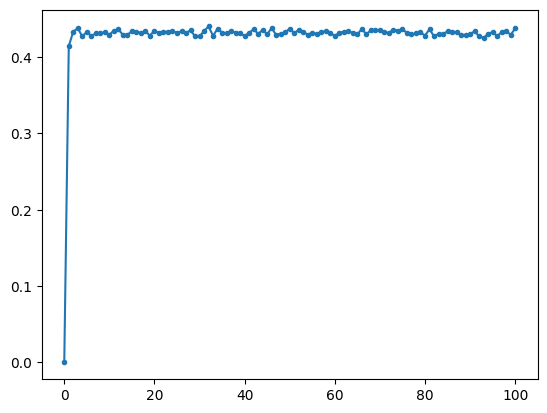

In [31]:
plt.plot(np.abs(rho_mean_list).mean(axis=0)[0], '.-')

In [32]:
t = 20 
corr= np.vstack([np.mean(rho_mean_list[:,:,t] * rho_mean_list[:,:,t+tau], axis=0) - np.mean(rho_mean_list[:,:,t], axis=0)*np.mean(rho_mean_list[:,:,t+tau], axis=0) for tau in range(1,tf-t)])

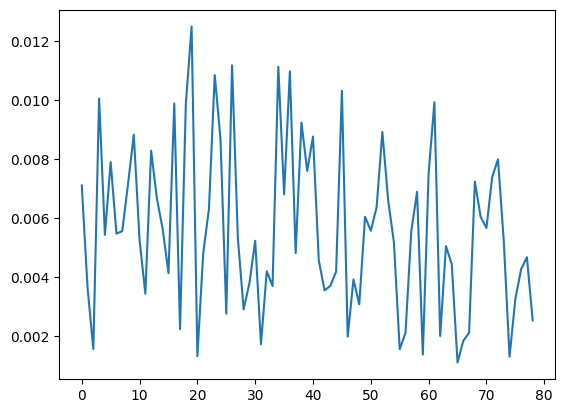

In [33]:
plt.plot(np.abs(corr)[:,0])

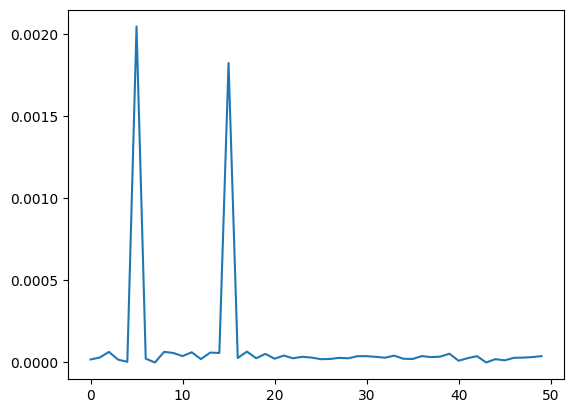

In [28]:
plt.plot(np.abs(corr)[:,-2])

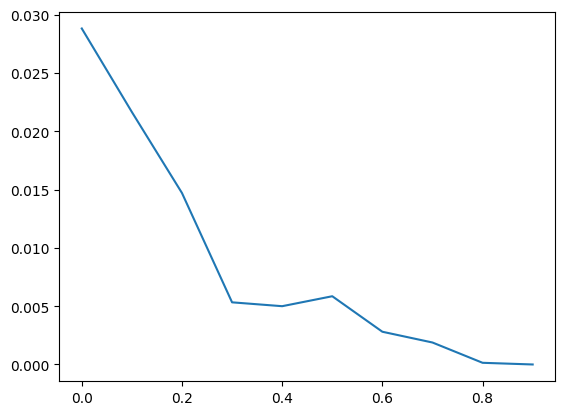

In [17]:
plt.plot(p_list, np.abs(corr))

In [301]:
rho_mean_list.shape

(20, 10, 101)

In [297]:
rho_mean_list.shape

(20, 10, 100)

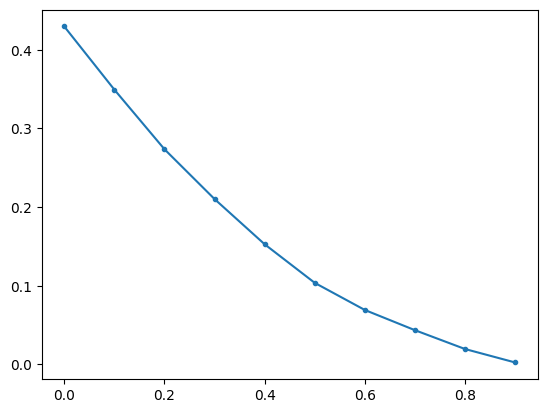

In [271]:
plt.plot(p_list, rho_mean_list, '.-')

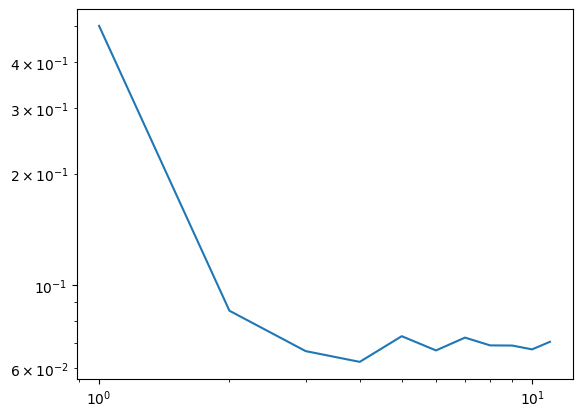

In [23]:
plt.plot( np.arange(1,tf+2), 0.5-np.mean(rho_mean_list, axis=0)[0] )
plt.xscale('log')
plt.yscale('log')

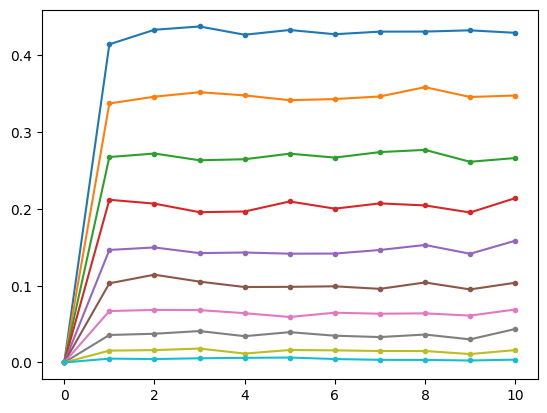

In [16]:
fig, ax= plt.subplots()
for i in range(len(p_list)):
    ax.plot(np.mean(rho_mean_list, axis=0)[i], '.-')

(array([996.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   3.]),
 array([0.        , 0.04999815, 0.0999963 , 0.14999445, 0.1999926 ,
        0.24999075, 0.29998891, 0.34998706, 0.39998521, 0.44998336,
        0.49998151]),
 <BarContainer object of 10 artists>)

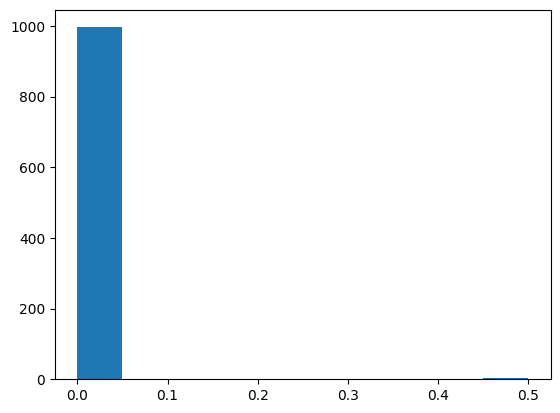

In [285]:
plt.hist(rho_mean_list[-1])

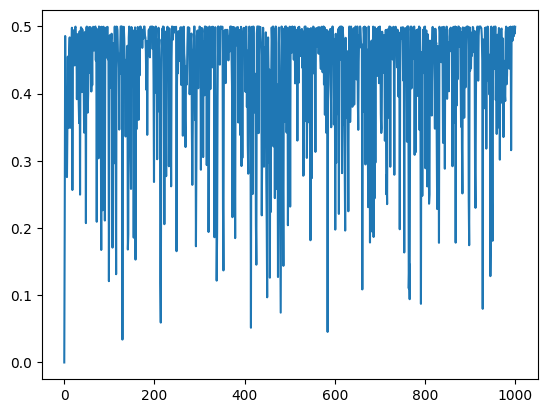

In [292]:
plt.plot(rho_mean_list[0])

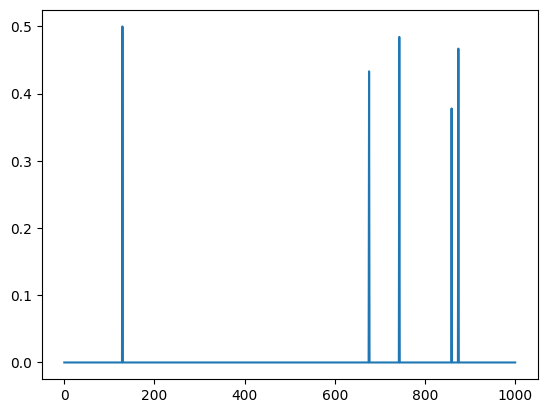

In [ ]:
plt.plot(rho_mean_list[-1])

In [129]:
np.round(rho_mean, 2)

array([[-0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  , -0.  +0.j  ],
       [ 0.  +0.j  ,  0.48+0.j  ,  0.06+0.05j,  0.  +0.j  ],
       [ 0.  +0.j  ,  0.06-0.05j,  0.52+0.j  ,  0.  +0.j  ],
       [-0.  -0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ]])

In [130]:
np.trace(rho_mean@rho_mean)

np.complex128(0.5139609659337561+0j)

In [94]:
np.round(rho_mean@rho_mean,4)

array([[0.    +0.j    , 0.    +0.j    , 0.    +0.j    , 0.    -0.j    ],
       [0.    +0.j    , 0.3041+0.j    , 0.2464-0.0584j, 0.    +0.j    ],
       [0.    +0.j    , 0.2464+0.0584j, 0.3243+0.j    , 0.    +0.j    ],
       [0.    +0.j    , 0.    +0.j    , 0.    +0.j    , 0.    +0.j    ]])

In [ ]:
can you write a function in "GTN.py", which convert from the covariance matrix `self.C_m` into the density matrix in the computation basis (let's just assume the exponential hilbert space is arrange in the normal binary computation order)
for example, a covariance matrix:
array([[ 0.,  1.,  0.,  0.],
        [-1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]]),

corresponds to a wave function |01> , then the density matrix is
rho = |01><01| = array([[0,0,0,0],
                        [0,1,0,0],
                        [0,0,0,0],
                        [0,0,0,0]])
where the basis is ordered as |00>,|01>,|10>,|11> (here we only have 2 qubit, so the covariance matrix dimension 2L =4 happen to  equal to the hilbert space dimension 2^L =4, but in general they are different)
you can assume L is a small number (say L<=10), so that we can explicitly construct the density matrix without worrying about the memory issue.                    


let me know if you have any questions.

SyntaxError: unterminated string literal (detected at line 1) (4011970477.py, line 1)

In [34]:
(gtn.C_m_history)

[array([[ 0.,  1.,  0.,  0.],
        [-1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]]),
 array([[ 2.57828059e-17,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-1.00000000e+00, -3.73958826e-18,  0.00000000e+00,
          0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         -1.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00,
          0.00000000e+00]]),
 array([[ 2.57828059e-17,  1.00000000e+00, -0.00000000e+00,
         -0.00000000e+00],
        [-1.00000000e+00, -3.73958826e-18, -0.00000000e+00,
         -0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.12889636e-17,
         -1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         -1.25701694e-17]]),
 array([[ 3.02143221e-17, -6.10895919e-01, -4.83997112e-01,
          6.26540478e-01],
        [ 6.10895919e-01,  1.24888466e-18, -6.26540478e-01,
         -4.83997112e-01],
    

In [ ]:
in "gtn=GTN.GTN(L=L,seed=seed,op=False,random_init=False,history=False)", this will generate a state with fixed parity (+,+,+,+,...), how ever i wnat to generate a sate with fixed parity (+,-), namely, the complex fermion wave function is |01>, how to do it